<a href="https://colab.research.google.com/github/NRmethun/ML-DL-Notebook/blob/main/Vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D ,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:

IMAGE_SIZE =[150,150]
train_dir = '/content/drive/My Drive/New_carrot/Train'
validation_dir  ='/content/drive/My Drive/New_carrot/Validate'

In [ ]:
mobilnet = VGG16(input_shape=(150, 150, 3),
                 weights='imagenet',
                 #weights=None ,
                 include_top=False)



for layer in mobilnet.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
last_output = mobilnet.output

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = Dense  (4, activation='softmax')(x)

model = Model( mobilnet.input, x)

model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
train_dir = '/content/drive/My Drive/New_carrot/Train'
validation_dir  ='/content/drive/My Drive/New_carrot/Validate'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,

                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical',
                                                          target_size = (150, 150) )

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = len(train_generator),
            epochs = 20,
            validation_steps = len(validation_generator),
            verbose = 2)

Epoch 1/20
16/16 - 231s - loss: 1.5287 - accuracy: 0.3750 - val_loss: 1.1344 - val_accuracy: 0.4500
Epoch 2/20
16/16 - 4s - loss: 1.0610 - accuracy: 0.5219 - val_loss: 0.7204 - val_accuracy: 0.7750
Epoch 3/20
16/16 - 4s - loss: 0.8929 - accuracy: 0.6406 - val_loss: 0.7394 - val_accuracy: 0.7375
Epoch 4/20
16/16 - 4s - loss: 0.7627 - accuracy: 0.6906 - val_loss: 0.6348 - val_accuracy: 0.7750
Epoch 5/20
16/16 - 4s - loss: 0.7150 - accuracy: 0.6969 - val_loss: 0.5279 - val_accuracy: 0.7625
Epoch 6/20
16/16 - 4s - loss: 0.6183 - accuracy: 0.7594 - val_loss: 0.7838 - val_accuracy: 0.7000
Epoch 7/20
16/16 - 4s - loss: 0.5887 - accuracy: 0.7625 - val_loss: 0.4879 - val_accuracy: 0.8250
Epoch 8/20
16/16 - 4s - loss: 0.6107 - accuracy: 0.7719 - val_loss: 0.5297 - val_accuracy: 0.8125
Epoch 9/20
16/16 - 4s - loss: 0.5480 - accuracy: 0.7906 - val_loss: 0.4922 - val_accuracy: 0.8000
Epoch 10/20
16/16 - 4s - loss: 0.5080 - accuracy: 0.8156 - val_loss: 0.5628 - val_accuracy: 0.7625
Epoch 11/20
16/16

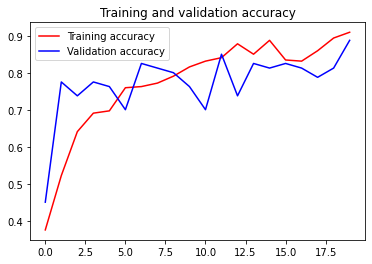

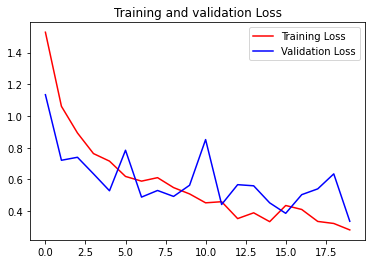

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving .jpg to .jpg (1)
.jpg
[[0.000000e+00 0.000000e+00 1.000000e+00 4.379567e-11]]


In [ ]:
model.save('VGG16.h5')

import keras
from keras.models import load_model

In [ ]:
load_model('VGG16.h5')